# Titanic DataSet analisis
---
---

## Tabla de contenido:
1. [Contexto](#1-bullet)
2. [Análisis de los datos](#2-bullet)
    1. [Importaciones](#2.1-bullet)
    2. [Cargar los datos](#2.2-bullet)
    3. [Tratamiento de los datos](#2.3-bullet)
        1. [Chequear valores faltantes](#2.3.1-bullet)
        2. [Eliminar faltantes](#2.3.2-bullet)
        3. [Imputar faltantes](#2.3.3-bullet)
    4. [Visualizacion de los datos](#2.4-bullet)
    5. [Feature Engineering (Ingeniería de Características)](#2.5-bullet)
3. [Conclusión](#3-bullet)

## Contexto <a class="anchor" id="1-bullet"></a>
---

## Análisis de los datos <a class="anchor" id="2-bullet"></a>
---

### Importaciones <a class="anchor" id="2.1-bullet"></a>

Numpy y Pandas son utiles para manipular los datos y Seaborn es util para visualizar los datos.

In [3]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

### Cargar los datos <a class="anchor" id="2.2-bullet"></a>

Para cargar los datos utilizamos Pandas, el cual carga los datos en una estructura de datos llamada **Dataframe**.

In [5]:
# Datos de entrenamiento.
training = pd.read_csv("../datasets/train.csv")

# Datos para testing.
testing = pd.read_csv("../datasets/test.csv")

Utilizando ```pd.dataframe.head()``` podemos ver las primeras filas de los dataframes.

In [6]:
training.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Para obtener las estadisticas, se puede realizar facilmente con la opcion de ```pd.dataframe.describe()```.

In [7]:
training.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Podemos mostrar los nombres de las columnas tambien utilizando ```pd.dataframe.keys()```.

In [8]:
training.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Tratamiento de los datos <a class="anchor" id="2.3-bullet"></a>

#### Chequear valores faltantes <a class="anchor" id="2.3.1-bullet"></a>

Para chequear los falores faltantes utilizamos isnull de pandas (```pd.isnull```)

In [9]:
pd.isnull(training).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Eliminar faltantes <a class="anchor" id="2.3.2-bullet"></a>

En este caso podemos ver que hay muchos atributos faltantes en *edad* y *cabina*.
En este contexto:
* Edad es muy importante y no lo podemos eliminar.
* Cabina si la podemos eliminar, ya que no aporta informacion relevante sobre el problema.
* Tampoco lo aporta ticket, asi que lo eliminamos tambien.

In [10]:
training.drop(columns=["Cabin", "Ticket"], inplace=True)
testing.drop(columns=["Cabin", "Ticket"], inplace=True)

pd.isnull(training).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

#### Imputar faltantes <a class="anchor" id="2.3.3-bullet"></a>

Como la edad es muy importante para eliminar, tenemos que decidir por que valor sustituir. Para eso graficamos para saber la distribucion que siguen los datos sin dichos atributos faltantes. Lo podemos hacer con el comando ```pd.dataframe.dropna(inplace = True)```. Antes realizamos una copia del conjunto, ya que al utilizar ```inplace = True``` le estamos diciendo a pandas que aplique el cambio al conjunto actual y no a una copia del mismo.

Para graficar utilizamos seaborn con el comando ```sns.displot(dataframe["Atributo"])```.

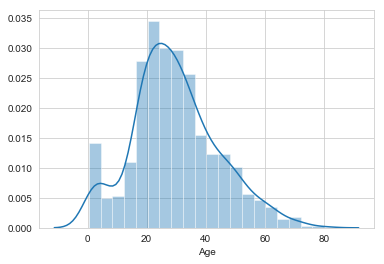

In [8]:
# Copiamos el dataframe para eliminar los faltantes.
copy = training.copy()
# Elimino los faltantes.
copy.dropna(inplace=True)
# Grafico.
sns.distplot(copy["Age"])

Como podemos ver, los datos tienen una distribucion cuasi-normal, por lo tanto, podemos sustituir los faltantes por la media. Para sustituir los faltantes, podemos utilizar el comando ```pd.dataframe["Atributo"].fillna(valor_a_sustituir)```.

In [11]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 

training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

### Visualizacion de los datos <a class="anchor" id="2.4-bullet"></a>

Para visualizar relaciones, utilizamos graficas especificas para cada caso. Por ejemplo, podemos graficar la edad
en funcion de la variable objetivo para ver si existe alguna relacion.

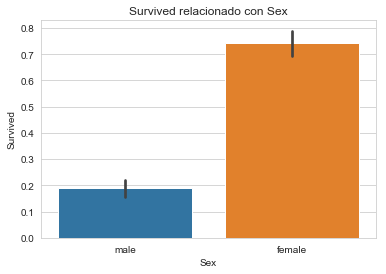

El total de personas que sobrevivieron es: 342
Mujeres:
0.6812865497076024
Hombres:
0.31871345029239767


In [10]:
# Grafica de barras.
sns.barplot(x="Sex", y="Survived", data=training)

plt.title("Survived relacionado con Sex")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("El total de personas que sobrevivieron es: " + str((total_survived_females + total_survived_males)))
print("Mujeres:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Hombres:")
print(total_survived_males/(total_survived_females + total_survived_males))

Podemos ver que el sexo es un atributo importante para la predicción.

Ahora chequearemos si la clase tambien es importante.

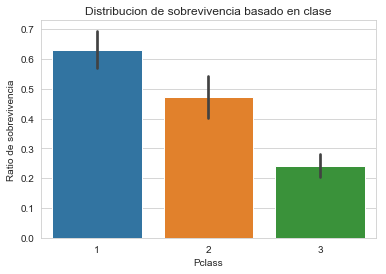

Cantidad de personas que sobrevivieron: 342
Proporcion de sobrevivencia de clase 1:
0.39766081871345027
Proporcion de sobrevivencia de clase 2:
0.2543859649122807
Proporcion de sobrevivencia de clase 3:
0.347953216374269


In [12]:
# Grafica en barras.
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Ratio de sobrevivencia")
plt.title("Distribucion de sobrevivencia basado en clase")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Cantidad de personas que sobrevivieron: " + str(total_survived_class))
print("Proporcion de sobrevivencia de clase 1:") 
print(total_survived_one/total_survived_class)
print("Proporcion de sobrevivencia de clase 2:")
print(total_survived_two/total_survived_class)
print("Proporcion de sobrevivencia de clase 3:")
print(total_survived_three/total_survived_class)

Si relacionamos ambos atributos.

Text(0.5,1,'Ratios de sobrevivencia basados en sexo y clase')

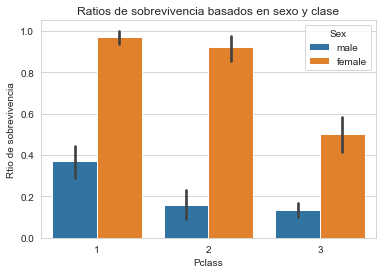

In [13]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Rtio de sobrevivencia")
plt.title("Ratios de sobrevivencia basados en sexo y clase")

En este caso al revés.

Text(0.5,1,'Ratios de sobrevivencia basados en sexo y clase')

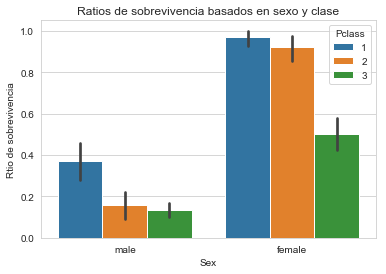

In [14]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Rtio de sobrevivencia")
plt.title("Ratios de sobrevivencia basados en sexo y clase")

En los ejemplos podemos ver que tanto el sexo como la clase son importantes. Si eras de clase 1, tenias mas probabilidad de 
salvarte que si fueras de alguna otra clase.

Podemos realizar el mismo análisis sobre el atributo "Age":

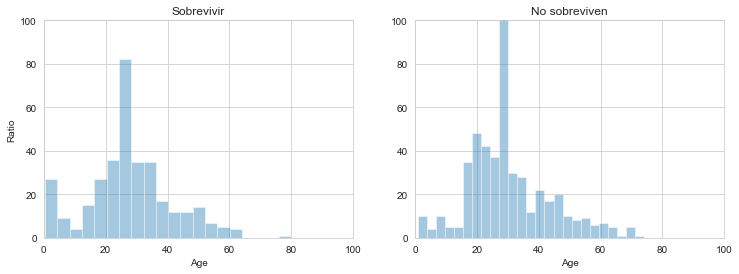

In [17]:
# Edades que sobrevivieron.
survived_ages = training[training.Survived == 1]["Age"]
# Edades que no sobrevivieron.
not_survived_ages = training[training.Survived == 0]["Age"]

plt.subplot(1, 2, 1)

sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Sobrevivir")
plt.ylabel("Ratio")

plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("No sobreviven")

plt.subplots_adjust(right=1.7)
plt.show()

Podemos utilizar un *"stripplot"* para ver la distribución de los datos. Por ejemplo, para ver la distribución de los que sobrevivieron con respecto a la edad ejecutamos lo siguiente:

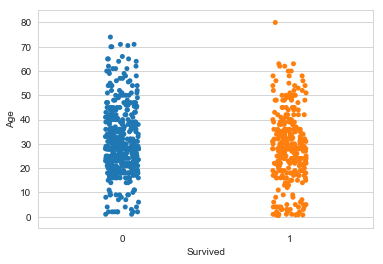

In [18]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

Podemos ver que los pasajeros jovenes tenian mas posibilidades de salvarse.

Podemos ver todos los graficos juntos con el siguiente comando: ```sns.pairplot```

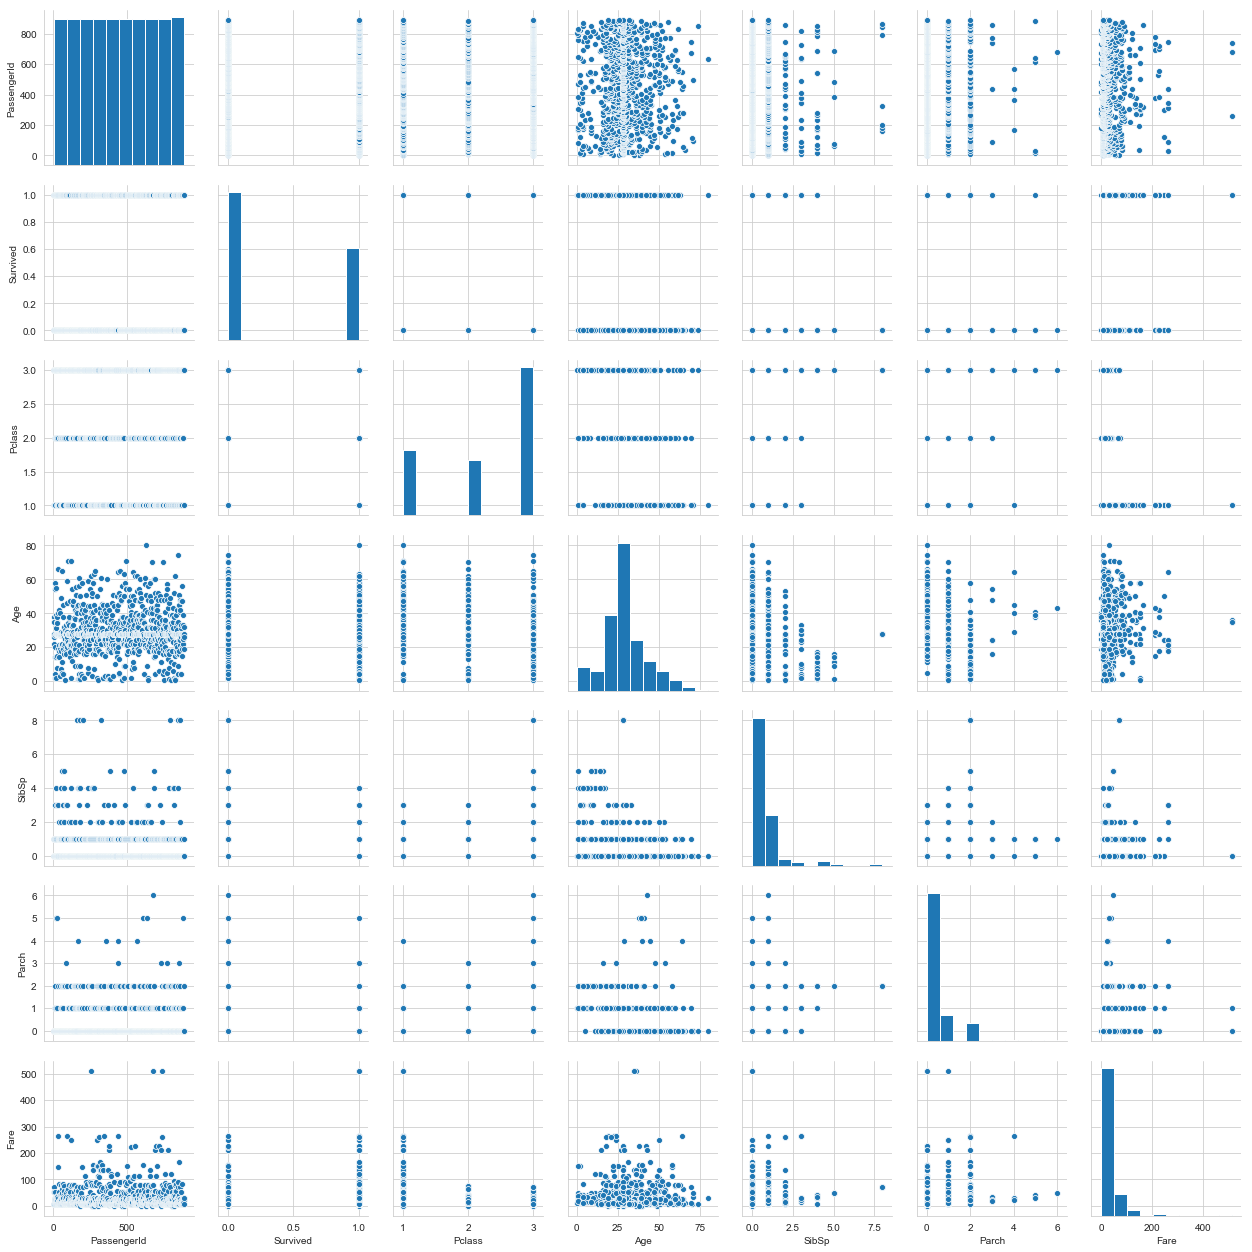

In [19]:
sns.pairplot(training)

### Feature Engineering (Ingeniería de Características)  <a class="anchor" id="2.5-bullet"></a>

Como sexo y embarcación son atributos categoricos, los tenemos que pasar a numeros. Para esto utilizamos **"one-hot-encoding"**.

Podemos muestrear ejemplos con el comando ```pd.dataframe.sample(N)```, donde ```N``` es el número de ejemplos a muestrear.

In [21]:
training.sample(5)

PassengerId  Survived  Pclass  \
105          106         0       3   
596          597         1       2   
31            32         1       1   
54            55         0       1   
291          292         1       1   

                                               Name     Sex   Age  SibSp  \
105                           Mionoff, Mr. Stoytcho    male  28.0      0   
596                      Leitch, Miss. Jessie Wills  female  28.0      0   
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
54                   Ostby, Mr. Engelhart Cornelius    male  65.0      0   
291         Bishop, Mrs. Dickinson H (Helen Walton)  female  19.0      1   

     Parch      Fare Embarked  
105      0    7.8958        S  
596      0   33.0000        S  
31       0  146.5208        C  
54       1   61.9792        C  
291      0   91.0792        C

Primeramente pasamos los atributos categóricos a atribútos numéricos ya que muchos modelos no aceptan atributos categóricos (nominales).

Para esto, simplemente le asignamos un valor a cada valor del atributo categórico. Podemos utilizar el comando ```pd.dataframe.loc[]``` que permite acceder a un grupo de filas o columnas (según especifiquemos) y simplemente le asignamos el valor que queremos.

In [22]:
# Convertimos el atributo "Sex".
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1
# Convertimos el atributo "Embarked".
training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

# Realizamos lo mismo para el conjunto de test.
testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

# Muestreamos 5 instancias para ver como quedaron los atributos.
training.sample(5)

PassengerId  Survived  Pclass                            Name  Sex   Age  \
163          164         0       3                 Calic, Mr. Jovo    0  17.0   
825          826         0       3                 Flynn, Mr. John    0  28.0   
356          357         1       1     Bowerman, Miss. Elsie Edith    1  22.0   
652          653         0       3  Kalvik, Mr. Johannes Halvorsen    0  21.0   
602          603         0       1       Harrington, Mr. Charles H    0  28.0   

     SibSp  Parch     Fare  Embarked  
163      0      0   8.6625         0  
825      0      0   6.9500         2  
356      0      1  55.0000         0  
652      0      0   8.4333         0  
602      0      0  42.4000         0

Tambien podemos combinar el atributo ***SibSp*** y ***Parch***, para saber cuan grande es la familia.

In [24]:
# Sumamos 1 porque es la persona + hermanos + padres.
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

Otro atributo interesante, es saber si se estaba solo o no. Para esto utilizamos ```pd.dataframe.apply```, que aplica un valor a los atributos. Tambien aprovechamos la caracteristica de python con la utilizacion de funciones lambdas.

In [25]:
# Creamos una nueva columna "IsAlone" y le asignamos el valor si el tamaño de la familia es 1.
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Una caracteristica que en principio no parece importante es el nombre, pero de este podemos extraer información.  Utilizando los indicadores de la presona podemos deducir su estatus en la sociedad. Por ejemplo: Señor, Señora, Señorita, etc.

In [30]:
# Agrego una columna titulo, el cual contiene el titulo de la persona.
# Utilizo "Regex" para obtenerlos.
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

# Muestro todos los titulos (si los agrego a un conjunto se eliminan los duplicados).
titles = set(training["Title"])

# Imprimo los titulos.
print("||", end=" ")
for i in titles:
    print(i, end="|| ")

|| Rev|| Mme|| Countess|| Major|| Ms|| Lady|| Mlle|| Master|| Jonkheer|| Miss|| Col|| Capt|| Mrs|| Don|| Mr|| Dr|| Sir|| 

Obtengo la frecuencia de aparicion de los titulos.

In [31]:
# Primeramente armo una lista con los titulos.
title_list = list(training["Title"])
frequency_titles = []

#  Para cada titulo en titles, cuento su frecuencia en title_list.
for i in titles:
    frequency_titles.append(title_list.count(i))

# Creo una lista con los titulos del conjunto (uno por vez).
titles = list(titles)

# Armo un dataframe para mostrar el titulo y la frecuencia.
title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

# Imprimo el dataframe.
print(title_dataframe)

      Titles  Frequency
0        Rev          6
1        Mme          1
2   Countess          1
3      Major          2
4         Ms          1
5       Lady          1
6       Mlle          2
7     Master         40
8   Jonkheer          1
9       Miss        182
10       Col          2
11      Capt          1
12       Mrs        125
13       Don          1
14        Mr        517
15        Dr          7
16       Sir          1


Agrego la columna al los datos, ya parseadas a números. En sí, no agrego todos los titulos, ya que me interesa el estatus, por lo que los que no me interesan les cambio a *"Other"*

In [23]:
# Creo los repmplazos.
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6

training.sample(5)

PassengerId  Survived  Pclass                                   Name  \
115          116         0       3                  Pekoniemi, Mr. Edvard   
774          775         1       2  Hocking, Mrs. Elizabeth (Eliza Needs)   
712          713         1       1               Taylor, Mr. Elmer Zebley   
231          232         0       3               Larsson, Mr. Bengt Edvin   
80            81         0       3                   Waelens, Mr. Achille   

     Sex   Age  SibSp  Parch    Fare  Embarked  FamSize  IsAlone  Title  
115    0  21.0      0      0   7.925         0        1        1      1  
774    1  54.0      1      3  23.000         0        5        0      2  
712    0  48.0      1      0  52.000         0        2        0      1  
231    0  29.0      0      0   7.775         0        1        1      1  
80     0  22.0      0      0   9.000         0        1        1      1

# 6 - Modelado y prediccion

Utilizamos varios modelos para obtener el de mejor prediccion.

In [24]:
# Modelos a utilizar:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

c:\users\maso\anaconda3\envs\ml-portfolio\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Para la performance utilizamos make_scorer, acuracy_score.

In [25]:
from sklearn.metrics import make_scorer, accuracy_score

Utilizaremos GridSearch para realizar validacion cruzada.

In [26]:
from sklearn.model_selection import GridSearchCV

Ahora debemos definir los atributos que utilizaremos para entrenar.

In [27]:
# Atributos.
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
# Defino los atributos del conjunto de entrenamiento.
X_train = training[features] 
# Defino la variable objetivo.
y_train = training["Survived"] 
# Hago lo mismo para testing.
X_test = testing[features] 

Creamos un conjunto de validacion (a parte del de test)

In [28]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### 6.1 - SVC

In [29]:
# Cargamos el modelo.
svc_clf = SVC() 
# Entrenamos el modelo.
svc_clf.fit(X_training, y_training)
# Realizamos las prediciones.
pred_svc = svc_clf.predict(X_valid)
# Calculamos la precision.
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7150837988826816


### 6.2 - Linear SVC

In [30]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.6703910614525139


### 6.3 - Random Forest

In [31]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8268156424581006


### 6.4 - Logistic Regression

In [32]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8044692737430168


### 6.5 - KNeighbors

In [33]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


### 6.6 - GaussianNB

In [34]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7821229050279329


### 6.7 - DecisionTree

In [35]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849162


### 6.8 - XGBoost

In [36]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print(acc_xg)

0.7988826815642458


c:\users\maso\anaconda3\envs\ml-portfolio\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## 7 - Evaluacion de la performance del modelo

In [37]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

Model  Accuracy
2         Random Forest  0.826816
3   Logistic Regression  0.804469
7         XGBClassifier  0.798883
5  Gaussian Naive Bayes  0.782123
6         Decision Tree  0.776536
4   K Nearest Neighbors  0.743017
0                   SVC  0.715084
1            Linear SVC  0.670391

## 8 - Mejorar los parametros del mejor modelo.

Optimizamos el modelo:

In [40]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring=make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Nuestro modelo optimizado es:")
grid_cv.best_estimator_

Nuestro modelo optimizado es:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Luego de optimizar los parametros, entrenamos el modelo con dichos parametros:

In [42]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.9162011173184358
